In [60]:
import pandas as pd

In [61]:
EURUSD = pd.read_csv('Data/EURUSD=X.csv')

In [62]:
EURUSD

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-26,1.098986,1.102400,1.098000,1.099118,1.099118,0.0
1,2016-07-27,1.098804,1.101000,1.098286,1.098780,1.098780,0.0
2,2016-07-28,1.106819,1.111999,1.106085,1.107346,1.107346,0.0
3,2016-07-29,1.108365,1.119600,1.107400,1.108438,1.108438,0.0
4,2016-08-01,1.116782,1.118401,1.115600,1.116807,1.116807,0.0
...,...,...,...,...,...,...,...
1300,2021-07-20,1.179245,1.180401,1.175710,1.179384,1.179384,0.0
1301,2021-07-21,1.178550,1.180275,1.175364,1.178411,1.178411,0.0
1302,2021-07-22,1.179523,1.182984,1.176664,1.179273,1.179273,0.0
1303,2021-07-23,1.177357,1.178550,1.175599,1.177274,1.177274,0.0


In [63]:
EURUSD['Date'] = pd.to_datetime(EURUSD['Date'])
EURUSD

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-26,1.098986,1.102400,1.098000,1.099118,1.099118,0.0
1,2016-07-27,1.098804,1.101000,1.098286,1.098780,1.098780,0.0
2,2016-07-28,1.106819,1.111999,1.106085,1.107346,1.107346,0.0
3,2016-07-29,1.108365,1.119600,1.107400,1.108438,1.108438,0.0
4,2016-08-01,1.116782,1.118401,1.115600,1.116807,1.116807,0.0
...,...,...,...,...,...,...,...
1300,2021-07-20,1.179245,1.180401,1.175710,1.179384,1.179384,0.0
1301,2021-07-21,1.178550,1.180275,1.175364,1.178411,1.178411,0.0
1302,2021-07-22,1.179523,1.182984,1.176664,1.179273,1.179273,0.0
1303,2021-07-23,1.177357,1.178550,1.175599,1.177274,1.177274,0.0


In [64]:
EURUSD = EURUSD.set_index('Date')

In [65]:
EURUSD = EURUSD.dropna()

In [66]:
from sklearn.model_selection import train_test_split
train, test = EURUSD.iloc[:int(len(EURUSD)*0.7),:-2], EURUSD.iloc[int(len(EURUSD)*0.7):,:-2]

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(train.iloc[:,:-1], train.iloc[:,-1])
pred = lr.predict(test.iloc[:,:-1])
error = mean_squared_error(test.iloc[:,-1], pred)
error

7.952120268443053e-08

In [68]:
lr.predict(test.iloc[1,:-1].values.reshape(1,-1))
test.iloc[1,:]

Open     1.104472
High     1.104850
Low      1.099832
Close    1.104728
Name: 2020-02-05 00:00:00, dtype: float64

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(train.iloc[:,:-1], train.iloc[:,-1])
pred_knn = knn.predict(test.iloc[:,:-1])
error_knn = mean_squared_error(test.iloc[:,-1], pred_knn)
error_knn

2.251399986389629e-06

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train.iloc[:,:-1], train.iloc[:,-1])
pred_rf = rf.predict(test.iloc[:,:-1])
error_rf = mean_squared_error(test.iloc[:, -1], pred_rf)
error_rf

5.828637930295009e-07

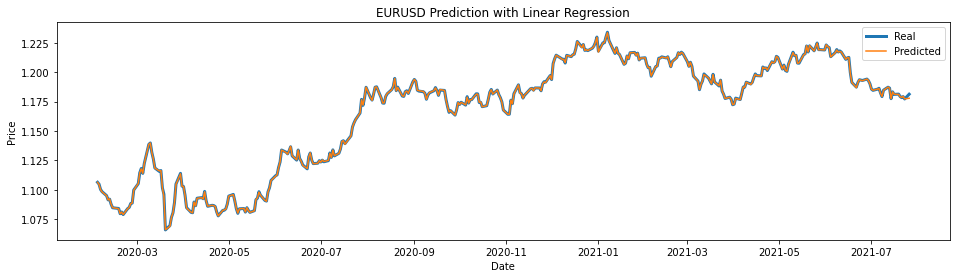

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.title('EURUSD Prediction with Linear Regression')
plt.plot(test.index, test['Close'], linewidth=3.0, label='Real')
plt.plot(test.index, pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [86]:
def forexpredictor(data, name):
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.set_index('Date')
    data = data.dropna()
    
    from sklearn.model_selection import train_test_split
    train, test = data.iloc[:int(len(data)*0.7),:-2], data.iloc[int(len(data)*0.7):,:-2]
    
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    lr = LinearRegression()
    lr.fit(train.iloc[:,:-1], train.iloc[:,-1])
    pred = lr.predict(test.iloc[:,:-1])
    error = mean_squared_error(test.iloc[:,-1], pred)
    print('Error: ', error)
    
    import joblib
    joblib.dump(lr, 'Model/model_{}.pkl'.format(name))
    joblib.dump(list(train.columns[:-1]), 'Model_Column/model_column_{}.pkl'.format(name))
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,4))
    plt.title('{} Prediction with Linear Regression'.format(name))
    plt.plot(test.index, test['Close'], linewidth=3.0, label='Real')
    plt.plot(test.index, pred, label='Predicted')
    #plt.text(2017, 1.5, 'Hey', fontsize=12)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

Error:  7.952120268443053e-08


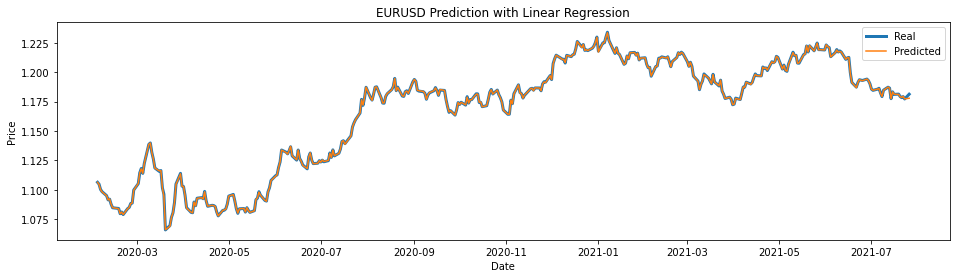

In [87]:
import pandas as pd
EURUSD = pd.read_csv('Data/EURUSD=X.csv')
forexpredictor(EURUSD, 'EURUSD')

Error:  1.2965113600141247e-05


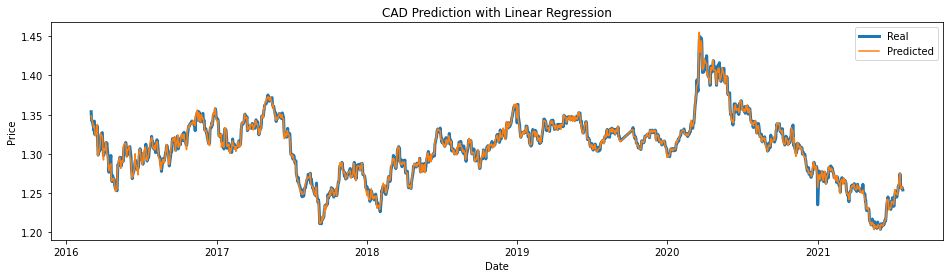

In [88]:
CAD = pd.read_csv('Data/CAD=X.csv')
forexpredictor(CAD, 'CAD')

Error:  3.6613632262699236e-06


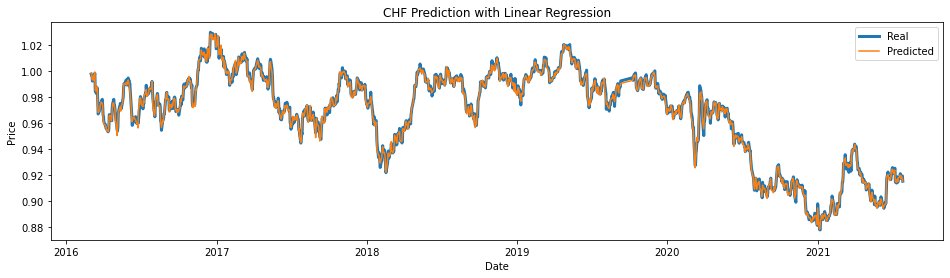

In [89]:
CHF = pd.read_csv('Data/CHF=X.csv')
forexpredictor(CHF, 'CHF')

Error:  2.3719776577838488e-05


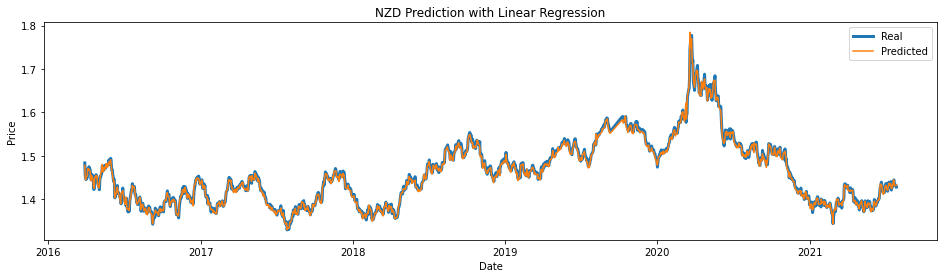

In [90]:
NZD = pd.read_csv('Data/NZD=X.csv')
forexpredictor(NZD, 'NZD')

Error:  4.298611755046689


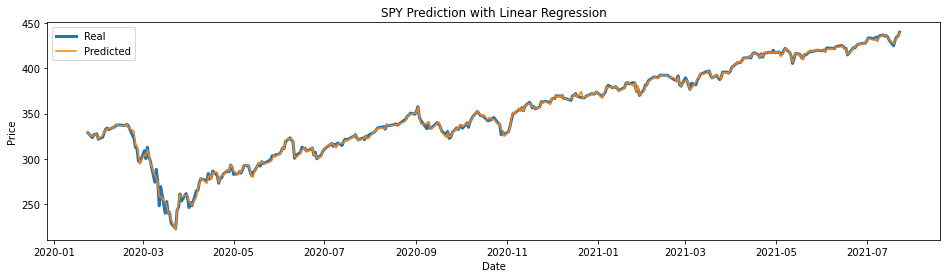

In [91]:
SPY = pd.read_csv('Data/SPY.csv')
forexpredictor(SPY, 'SPY')

Error:  0.0010273321004736079


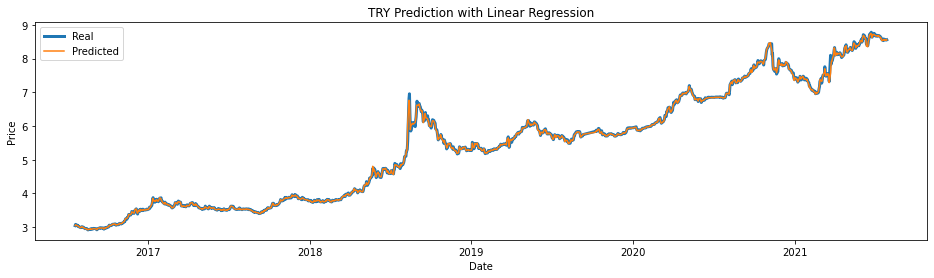

In [92]:
TRY = pd.read_csv('Data/TRY=X.csv')
forexpredictor(TRY, 'TRY')